In [1]:
import json
import time
import requests
import mpld3
import datetime as dt
# mpld3.enable_notebook()
%matplotlib notebook
# %matplotlib inline
import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (15,5)

In [ ]:
{'access_token': 'NVLRGCXKDXnmG1qx11CVb1OiBZ9cpxJo',
 'token_type': 'Bearer',
 'expires_in': 3599,
 'refresh_token': 'wlabCb90DerYoVpXfGmipqwNQfu2XAnT',
 'scope': 'smartWrite'}

In [2]:
API_KEY = 'Sp2ixgD56v9NB9hUozd17nYWJ9fAjrti'

In [ ]:
def request_pin(self) -> bool:
        """Requests a PIN from ecobee for authorization on ecobee.com."""
        params = {"response_type": "ecobeePin","client_id": API_KEY,"scope": "smartWrite",}
        response = self._request(
            "GET",
            ECOBEE_ENDPOINT_AUTH,
            log_msg_action,
            params=params,
            auth_request=True,
        )

        try:
            self.authorization_code = response["code"]
            self.pin = response["ecobeePin"]

In [10]:
# url_auth = 'https://api.ecobee.com/authorize'
# params = {"response_type": "ecobeePin","client_id": API_KEY,"scope": "smartWrite",}
# r = requests.get(url_auth, json=params)
# url = 'https://api.ecobee.com/authorize?'+'response_type=code&client_id='+API_KEY+'&scope=smartWrite'
# r=requests.get(url)
# r
# https://api.ecobee.com/authorize?
#         response_type=code&
#         client_id=APP_KEY&
#         redirect_uri=YOUR_SERVER_URI&
#         scope=SCOPE&
#         state=YOUR_STATE

params = {'response_type': 'ecobeePin', 'client_id': API_KEY, 'scope': 'smartRead'}
AUTH_URL = 'https://api.ecobee.com/authorize'
# Request the PIN and convert the JSON results to a Python dictionary
results = requests.get(AUTH_URL, params=params).json()


In [11]:
auth_code = results['code']
results

{'ecobeePin': '453h',
 'code': 'iSvC4nMufrMNf4Cg4PVYUl3OzMzxv7GN',
 'scope': 'smartRead',
 'expires_in': 9,
 'interval': 30}

In [8]:
def get_tokens(auth_code):
    """
    Requests an access and refresh token from the Ecobee API.

    Parameters
    ----------
    auth_code: This is the Ecobee authorization code that was returned when the PIN
        was requested.

    Returns
    -------
    Returns a 3-tuple:
        success: a boolean indicating whether the token request succeeded
        access_token: a 32 character access token, or None if request wasn't successful
        refresh_token: a 32 character refresh token, or None if request wasn't successful
    """
    # parameters needed to request tokens
    params = {'grant_type': 'ecobeePin', 'client_id': API_KEY, 'code': auth_code}

    # Request the Tokens
    response = requests.post(TOKEN_URL, params=params, timeout=5)
    if response.status_code == requests.codes.ok:
        results = response.json()
        print(results)
        return True, results['access_token'], results['refresh_token']
    else:
        return False, None, None


In [9]:
a = get_tokens(auth_code)
a

NameError: name 'TOKEN_URL' is not defined

In [76]:
# Refreshing Token:
REFRESH_TOKEN = refresh_token
url_base = 'https://api.ecobee.com/token?grant_type=refresh_token&refresh_token='
url_client = '&client_id='
header = {'Content-Type':'text/json', 'Authorization':'Bearer ' + access_token}
payload = {'json': '{"selection":{"selectionType":"registered","selectionMatch":"","includeRuntime":"true"}}'}
r = requests.post(url_base+REFRESH_TOKEN+url_client+API_KEY, headers=header)
# r.json()
# Saving Refresh token
print(r.json())
refresh_token = r.json()['refresh_token']
access_token = r.json()['access_token']
print('New Refresh_Token: ', refresh_token)
print('New Access_Token: ', access_token)

{'access_token': 'BHkKhvbB7butcGX4oO36ODahmUHZ7EmG', 'token_type': 'Bearer', 'expires_in': 3599, 'refresh_token': 'W57DUvZxbko73OBVp9G58ZwweVxYtRxk', 'scope': 'smartWrite'}
New Refresh_Token:  W57DUvZxbko73OBVp9G58ZwweVxYtRxk
New Access_Token:  BHkKhvbB7butcGX4oO36ODahmUHZ7EmG


In [106]:
# Routine:
api_key = 'Sp2ixgD56v9NB9hUozd17nYWJ9fAjrti'
# auth_code = EB_auth_code(api_key)
# print('auth_code: ', auth_code)
tokens = EB_access_token(api_key, '')
# print('tokens: ', tokens)
# data = EB_info(tokens[0], tokens[1])
# EB_hvac_mode(tokens[0], tokens[1], mode='cool')
# EB_hvac_temp(tokens[0], tokens[1], temp=650)


<Response [401]>
Error


In [39]:
api_key = 'Sp2ixgD56v9NB9hUozd17nYWJ9fAjrti'
# tokens = EB_access_token(api_key, auth_code)


None


In [164]:
tokens

['OYzYndyyhHIqWLKaCgZrxj1tFbV2iEZM', '6ooQRAneCeFvPDT4lWwlEUyjqdO6uAxo']

In [2]:
def EB_auth_code(api_key):
    params = {'response_type': 'ecobeePin', 'client_id': api_key, 'scope': 'smartWrite'}
    auth_url = 'https://api.ecobee.com/authorize'
    # Request the PIN and convert the JSON results to a Python dictionary
    results = requests.get(auth_url, params=params).json()
    print(results)
    return results['code']

def EB_access_token(api_key, auth_code):
#     header = {'Content-Type':'text/json;charset=UTF-8'}
    # parameters needed to request tokens
    params = {'grant_type': 'ecobeePin', 'client_id': api_key, 'code': auth_code}
    # Request the Tokens
    token_url = 'https://api.ecobee.com/token'
    response = requests.post(token_url, params=params, timeout=10)
    print(response)
    if response.status_code == requests.codes.ok:
        results = response.json()
        return [results['access_token'], results['refresh_token']]
    else:
        print('Error')
        return None

def EB_refresh_token(access_token, refresh_token, api_key):
    REFRESH_TOKEN = refresh_token
    url_base = 'https://api.ecobee.com/token?grant_type=refresh_token&refresh_token='
    url_client = '&client_id='
    header = {'Content-Type':'text/json', 'Authorization':'Bearer ' + access_token}
    try:
        r = requests.post(url_base+REFRESH_TOKEN+url_client+api_key, headers=header, timeout=10)
        # Saving Refresh token
        refresh_token = r.json()['refresh_token']
        access_token = r.json()['access_token']
        print('New Refresh_Token: ', refresh_token)
        print('New Access_Token: ', access_token)
        return[access_token, refresh_token]
    except:
        print('An exception happened refresh_token: ', r)
        print(r.json())
        print("END REFRESH TOKEN")
        
    


def EB_hvac_mode(access_token, refresh_token, mode = 'off'):
    # mode: heat, cool, auto, off
    header = {'Content-Type': 'application/json;charset=UTF-8', 'Authorization':'Bearer ' + access_token}
    payload = {'selection':{'selectionType':'registered','selectionMatch':''},'thermostat':{'settings':{'hvacMode':mode}}}
    url = "https://api.ecobee.com/1/thermostat?format=json"
    try:
        r = requests.post(url, json=payload, headers=header, timeout=10)
    except:
        print('An exception happened in hvac_mode: ', r)
        print(r.json())
    
    
def EB_hvac_temp(access_token, refresh_token, temp = 690):
    header = {'Content-Type': 'application/json;charset=UTF-8', 'Authorization':'Bearer ' + access_token}
    payload = {"selection": {"selectionType":"registered","selectionMatch":""},"functions": [{"type":"setHold","params":{"holdType":"nextTransition","heatHoldTemp":temp,"coolHoldTemp":temp}}]}
    url = "https://api.ecobee.com/1/thermostat?format=json"
    try:
        r = requests.post(url, json=payload, headers=header, timeout=10)
    except:
        print('An exception happened in hvac_temp: ', r)
        print(r.json())
    
    
def EB_info(access_token, refresh_token):
    url = 'https://api.ecobee.com/1/thermostat'
    header = {'Content-Type':'text/json', 'Authorization':'Bearer ' + access_token}
    payload = {'json': '{"selection":{"selectionType":"registered","selectionMatch":"","includeRuntime":"true","includeSettings":"true"}}'}
    tokens = [access_token, refresh_token]
    try:
        resp = requests.get(url, params=payload, headers=header, timeout=10)
#         print(resp.json())
        therm_time = resp.json()['thermostatList'][0]['thermostatTime']
        last_mod = resp.json()['thermostatList'][0]['lastModified']
        temp = resp.json()['thermostatList'][0]['runtime']['actualTemperature']
        hum = resp.json()['thermostatList'][0]['runtime']['actualHumidity']
        mode = resp.json()['thermostatList'][0]['settings']['hvacMode']
        print('Thermostat_time: ', therm_time)
        print('Last_Modified: ', last_mod)
        print('Temperature: ', temp)
        print('Humidity: ', hum)
        print('HVAC Mode: ', mode)
        print()
        print('------------')
        print()
        return [[therm_time, temp, hum, mode], tokens]
    except KeyError:
        print('Key not present. Most likely token is expired. Refreshing and continuing...')
        # Call Refresh token
        tokens = EB_refresh_token(access_token, refresh_token, api_key)
        print('DONE REFRESH TOKEN...')
        access_token = tokens[0]
        refresh_token = tokens[1]
        url = 'https://api.ecobee.com/1/thermostat'
        header = {'Content-Type':'text/json', 'Authorization':'Bearer ' + access_token}
        payload = {'json': '{"selection":{"selectionType":"registered","selectionMatch":"","includeRuntime":"true","includeSettings":"true"}}'}
        try:
            resp = requests.get(url, params=payload, headers=header, timeout=10)
            therm_time = resp.json()['thermostatList'][0]['thermostatTime']
            last_mod = resp.json()['thermostatList'][0]['lastModified']
            temp = resp.json()['thermostatList'][0]['runtime']['actualTemperature']
            hum = resp.json()['thermostatList'][0]['runtime']['actualHumidity']
            mode = resp.json()['thermostatList'][0]['settings']['hvacMode']
            print('Thermostat_time: ', therm_time)
            print('Last_Modified: ', last_mod)
            print('Temperature: ', temp)
            print('Humidity: ', hum)
            print('HVAC Mode: ', mode)
            print()
            print('------------')
            print()
            return [[therm_time, temp, hum, mode], tokens]
        except:
            print('An exception happened line 110: ', resp)
#             print(resp.json())
            return [None, tokens]


def control_heat(temp_setpoint, access_token, refresh_token):
    tokens = [access_token, refresh_token]
    data = EB_info(tokens[0], tokens[1])
    print('Current_temp: ', data[1])
    if data[1] < temp_setpoint:
        if mode == 'heat':
            print('Heating mode already enabled')
        else:
            EB_hvac_mode(tokens[0], tokens[1],mode=mode)
            EB_hvac_temp(tokens[0], tokens[1], temp=temp_setpoint+30)
            print('HEATING')
            print('------------')
    else:
        mode = 'off'
        EB_hvac_mode(tokens[0], tokens[1],mode=mode)
        print('OFF')
        print('------------')
    return data

In [ ]:
api_key = 'AbziOl3GZDmJKrN4a6MbAIpYBbXR6tPb'

In [118]:
api_key = 'AbziOl3GZDmJKrN4a6MbAIpYBbXR6tPb'
therm_time2 = []
curr_temp2 = []
curr_hum2 = []
temp_setpoint = 700
mode = 'off'
i = 0
tokens = EB_refresh_token(tokens[0], tokens[1], api_key)

# control:
while i < 720:
    info = EB_info(tokens[0], tokens[1])  # Get tmep, actual time, humidity, and tokens
    data = info[0]  # Temp, actual time and humidity
    tokens = info[1]
    if data != None:
        therm_time.append(data[0])
        curr_temp.append(data[1])
        curr_hum.append(data[2])
        print('Current_temp: ', data[1])
        if data[1] < temp_setpoint:        # Compare actual temp returned from ecobee with temp setpoint
            if data[3] == 'heat':
                print('Heating mode already enabled')
                EB_hvac_temp(tokens[0], tokens[1], temp=temp_setpoint+30) # Ensure heater stays on
            else:
                EB_hvac_mode(tokens[0], tokens[1], mode='heat')    # change hvac mode to heat
                EB_hvac_temp(tokens[0], tokens[1], temp=temp_setpoint+30)  # Ensure heater stays on
                print('HEATING')
                print('------------')
        else:
            if data[3] == 'off':
                print('Off mode enabled')
            else:
                EB_hvac_mode(tokens[0], tokens[1],mode='off')
                print('OFF')
                print('------------')
    else:
        print('data equals None')
    i = i+1
    time.sleep(30)

# for i in range(720):
#     info = control_heat(temp_setpoint=temp_setpoint, access_token=tokens[0], refresh_token=tokens[1])
#     therm_time.append(info[0])
#     curr_temp.append(info[1])
#     curr_hum.append(info[2])
#     time.sleep(30)

New Refresh_Token:  QhTFpzRD1gUUKzooq6eqdU2OsoQlI20s
New Access_Token:  tgoUxVu4mv0zJGolvRH4eUEVDpcySsY5
ENTERING WHILE LOOP...
Thermostat_time:  2020-02-12 21:31:36
Last_Modified:  2020-02-13 05:29:05
Temperature:  648
Humidity:  46
HVAC Mode:  heat

------------

Current_temp:  648
Heating mode already enabled
Thermostat_time:  2020-02-12 21:32:06
Last_Modified:  2020-02-13 05:29:05
Temperature:  648
Humidity:  46
HVAC Mode:  heat

------------

Current_temp:  648
Heating mode already enabled
Thermostat_time:  2020-02-12 21:32:37
Last_Modified:  2020-02-13 05:29:05
Temperature:  646
Humidity:  46
HVAC Mode:  heat

------------

Current_temp:  646
Heating mode already enabled
Thermostat_time:  2020-02-12 21:33:07
Last_Modified:  2020-02-13 05:29:05
Temperature:  646
Humidity:  46
HVAC Mode:  heat

------------

Current_temp:  646
Heating mode already enabled
Thermostat_time:  2020-02-12 21:33:37
Last_Modified:  2020-02-13 05:29:05
Temperature:  646
Humidity:  46
HVAC Mode:  heat

----

Thermostat_time:  2020-02-12 21:53:55
Last_Modified:  2020-02-13 05:29:05
Temperature:  682
Humidity:  44
HVAC Mode:  heat

------------

Current_temp:  682
Heating mode already enabled
Thermostat_time:  2020-02-12 21:54:26
Last_Modified:  2020-02-13 05:29:05
Temperature:  682
Humidity:  44
HVAC Mode:  heat

------------

Current_temp:  682
Heating mode already enabled
Thermostat_time:  2020-02-12 21:54:56
Last_Modified:  2020-02-13 05:29:05
Temperature:  682
Humidity:  44
HVAC Mode:  heat

------------

Current_temp:  682
Heating mode already enabled
Thermostat_time:  2020-02-12 21:55:27
Last_Modified:  2020-02-13 05:29:05
Temperature:  682
Humidity:  44
HVAC Mode:  heat

------------

Current_temp:  682
Heating mode already enabled
Thermostat_time:  2020-02-12 21:55:57
Last_Modified:  2020-02-13 05:29:05
Temperature:  682
Humidity:  44
HVAC Mode:  heat

------------

Current_temp:  682
Heating mode already enabled
Thermostat_time:  2020-02-12 21:56:27
Last_Modified:  2020-02-13 05:29

Thermostat_time:  2020-02-12 22:17:13
Last_Modified:  2020-02-13 06:03:35
Temperature:  713
Humidity:  39
HVAC Mode:  off

------------

Current_temp:  713
Off mode enabled
Thermostat_time:  2020-02-12 22:17:43
Last_Modified:  2020-02-13 06:03:35
Temperature:  713
Humidity:  39
HVAC Mode:  off

------------

Current_temp:  713
Off mode enabled
Thermostat_time:  2020-02-12 22:18:14
Last_Modified:  2020-02-13 06:03:35
Temperature:  713
Humidity:  39
HVAC Mode:  off

------------

Current_temp:  713
Off mode enabled
Thermostat_time:  2020-02-12 22:18:44
Last_Modified:  2020-02-13 06:03:35
Temperature:  710
Humidity:  40
HVAC Mode:  off

------------

Current_temp:  710
Off mode enabled
Thermostat_time:  2020-02-12 22:19:14
Last_Modified:  2020-02-13 06:03:35
Temperature:  710
Humidity:  40
HVAC Mode:  off

------------

Current_temp:  710
Off mode enabled
Thermostat_time:  2020-02-12 22:19:45
Last_Modified:  2020-02-13 06:03:35
Temperature:  710
Humidity:  40
HVAC Mode:  off

------------

Thermostat_time:  2020-02-12 22:40:00
Last_Modified:  2020-02-13 06:29:05
Temperature:  695
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  695
Heating mode already enabled
Thermostat_time:  2020-02-12 22:40:31
Last_Modified:  2020-02-13 06:29:05
Temperature:  695
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  695
Heating mode already enabled
Thermostat_time:  2020-02-12 22:41:01
Last_Modified:  2020-02-13 06:29:05
Temperature:  695
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  695
Heating mode already enabled
Thermostat_time:  2020-02-12 22:41:31
Last_Modified:  2020-02-13 06:29:05
Temperature:  695
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  695
Heating mode already enabled
Thermostat_time:  2020-02-12 22:42:02
Last_Modified:  2020-02-13 06:29:05
Temperature:  695
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  695
Heating mode already enabled
Thermostat_time:  2020-02-12 22:42:32
Last_Modified:  2020-02-13 06:29

Thermostat_time:  2020-02-12 23:03:17
Last_Modified:  2020-02-13 06:53:05
Temperature:  710
Humidity:  40
HVAC Mode:  off

------------

Current_temp:  710
Off mode enabled
Thermostat_time:  2020-02-12 23:03:48
Last_Modified:  2020-02-13 06:53:05
Temperature:  709
Humidity:  39
HVAC Mode:  off

------------

Current_temp:  709
Off mode enabled
Thermostat_time:  2020-02-12 23:04:18
Last_Modified:  2020-02-13 06:53:05
Temperature:  709
Humidity:  39
HVAC Mode:  off

------------

Current_temp:  709
Off mode enabled
Thermostat_time:  2020-02-12 23:04:49
Last_Modified:  2020-02-13 06:53:05
Temperature:  709
Humidity:  39
HVAC Mode:  off

------------

Current_temp:  709
Off mode enabled
Thermostat_time:  2020-02-12 23:05:19
Last_Modified:  2020-02-13 06:53:05
Temperature:  709
Humidity:  39
HVAC Mode:  off

------------

Current_temp:  709
Off mode enabled
Thermostat_time:  2020-02-12 23:05:49
Last_Modified:  2020-02-13 06:53:05
Temperature:  709
Humidity:  39
HVAC Mode:  off

------------

Thermostat_time:  2020-02-12 23:26:35
Last_Modified:  2020-02-13 07:16:35
Temperature:  686
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  686
Heating mode already enabled
Thermostat_time:  2020-02-12 23:27:05
Last_Modified:  2020-02-13 07:16:35
Temperature:  686
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  686
Heating mode already enabled
Thermostat_time:  2020-02-12 23:27:35
Last_Modified:  2020-02-13 07:16:35
Temperature:  686
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  686
Heating mode already enabled
Thermostat_time:  2020-02-12 23:28:06
Last_Modified:  2020-02-13 07:16:35
Temperature:  686
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  686
Heating mode already enabled
Thermostat_time:  2020-02-12 23:28:36
Last_Modified:  2020-02-13 07:16:35
Temperature:  686
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  686
Heating mode already enabled
Thermostat_time:  2020-02-12 23:29:06
Last_Modified:  2020-02-13 07:16

Thermostat_time:  2020-02-12 23:48:21
Last_Modified:  2020-02-13 07:30:35
Temperature:  671
Humidity:  44
HVAC Mode:  heat

------------

Current_temp:  671
Heating mode already enabled
Thermostat_time:  2020-02-12 23:48:51
Last_Modified:  2020-02-13 07:30:35
Temperature:  675
Humidity:  43
HVAC Mode:  heat

------------

Current_temp:  675
Heating mode already enabled
Thermostat_time:  2020-02-12 23:49:21
Last_Modified:  2020-02-13 07:30:35
Temperature:  675
Humidity:  43
HVAC Mode:  heat

------------

Current_temp:  675
Heating mode already enabled
Thermostat_time:  2020-02-12 23:49:52
Last_Modified:  2020-02-13 07:30:35
Temperature:  675
Humidity:  43
HVAC Mode:  heat

------------

Current_temp:  675
Heating mode already enabled
Thermostat_time:  2020-02-12 23:50:22
Last_Modified:  2020-02-13 07:30:35
Temperature:  675
Humidity:  43
HVAC Mode:  heat

------------

Current_temp:  675
Heating mode already enabled
Thermostat_time:  2020-02-12 23:50:52
Last_Modified:  2020-02-13 07:30

Thermostat_time:  2020-02-13 00:11:07
Last_Modified:  2020-02-13 07:30:35
Temperature:  676
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  676
Heating mode already enabled
Thermostat_time:  2020-02-13 00:11:37
Last_Modified:  2020-02-13 07:30:35
Temperature:  674
Humidity:  43
HVAC Mode:  heat

------------

Current_temp:  674
Heating mode already enabled
Thermostat_time:  2020-02-13 00:12:08
Last_Modified:  2020-02-13 07:30:35
Temperature:  674
Humidity:  43
HVAC Mode:  heat

------------

Current_temp:  674
Heating mode already enabled
Thermostat_time:  2020-02-13 00:12:38
Last_Modified:  2020-02-13 07:30:35
Temperature:  674
Humidity:  43
HVAC Mode:  heat

------------

Current_temp:  674
Heating mode already enabled
Thermostat_time:  2020-02-13 00:13:08
Last_Modified:  2020-02-13 07:30:35
Temperature:  674
Humidity:  43
HVAC Mode:  heat

------------

Current_temp:  674
Heating mode already enabled
Thermostat_time:  2020-02-13 00:13:39
Last_Modified:  2020-02-13 07:30

Thermostat_time:  2020-02-13 00:32:53
Last_Modified:  2020-02-13 07:30:35
Temperature:  681
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  681
Heating mode already enabled
Thermostat_time:  2020-02-13 00:33:23
Last_Modified:  2020-02-13 07:30:35
Temperature:  681
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  681
Heating mode already enabled
Thermostat_time:  2020-02-13 00:33:54
Last_Modified:  2020-02-13 07:30:35
Temperature:  681
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  681
Heating mode already enabled
Thermostat_time:  2020-02-13 00:34:24
Last_Modified:  2020-02-13 07:30:35
Temperature:  681
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  681
Heating mode already enabled
Thermostat_time:  2020-02-13 00:34:54
Last_Modified:  2020-02-13 07:30:35
Temperature:  681
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  681
Heating mode already enabled
Thermostat_time:  2020-02-13 00:35:25
Last_Modified:  2020-02-13 07:30

Thermostat_time:  2020-02-13 00:55:38
Last_Modified:  2020-02-13 07:30:35
Temperature:  668
Humidity:  44
HVAC Mode:  heat

------------

Current_temp:  668
Heating mode already enabled
Thermostat_time:  2020-02-13 00:56:09
Last_Modified:  2020-02-13 07:30:35
Temperature:  668
Humidity:  44
HVAC Mode:  heat

------------

Current_temp:  668
Heating mode already enabled
Thermostat_time:  2020-02-13 00:56:39
Last_Modified:  2020-02-13 07:30:35
Temperature:  668
Humidity:  44
HVAC Mode:  heat

------------

Current_temp:  668
Heating mode already enabled
Thermostat_time:  2020-02-13 00:57:09
Last_Modified:  2020-02-13 07:30:35
Temperature:  666
Humidity:  44
HVAC Mode:  heat

------------

Current_temp:  666
Heating mode already enabled
Thermostat_time:  2020-02-13 00:57:40
Last_Modified:  2020-02-13 07:30:35
Temperature:  666
Humidity:  44
HVAC Mode:  heat

------------

Current_temp:  666
Heating mode already enabled
Thermostat_time:  2020-02-13 00:58:10
Last_Modified:  2020-02-13 07:30

Thermostat_time:  2020-02-13 01:18:25
Last_Modified:  2020-02-13 07:30:35
Temperature:  682
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  682
Heating mode already enabled
Thermostat_time:  2020-02-13 01:18:55
Last_Modified:  2020-02-13 07:30:35
Temperature:  682
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  682
Heating mode already enabled
Thermostat_time:  2020-02-13 01:19:26
Last_Modified:  2020-02-13 07:30:35
Temperature:  680
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  680
Heating mode already enabled
Thermostat_time:  2020-02-13 01:19:56
Last_Modified:  2020-02-13 07:30:35
Temperature:  680
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  680
Heating mode already enabled
Thermostat_time:  2020-02-13 01:20:26
Last_Modified:  2020-02-13 07:30:35
Temperature:  680
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  680
Heating mode already enabled
Thermostat_time:  2020-02-13 01:20:57
Last_Modified:  2020-02-13 07:30

Thermostat_time:  2020-02-13 01:40:12
Last_Modified:  2020-02-13 07:30:35
Temperature:  680
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  680
Heating mode already enabled
Thermostat_time:  2020-02-13 01:40:42
Last_Modified:  2020-02-13 07:30:35
Temperature:  680
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  680
Heating mode already enabled
Thermostat_time:  2020-02-13 01:41:12
Last_Modified:  2020-02-13 07:30:35
Temperature:  680
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  680
Heating mode already enabled
Thermostat_time:  2020-02-13 01:41:43
Last_Modified:  2020-02-13 07:30:35
Temperature:  680
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  680
Heating mode already enabled
Thermostat_time:  2020-02-13 01:42:13
Last_Modified:  2020-02-13 07:30:35
Temperature:  680
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  680
Heating mode already enabled
Thermostat_time:  2020-02-13 01:42:44
Last_Modified:  2020-02-13 07:30

Thermostat_time:  2020-02-13 02:03:09
Last_Modified:  2020-02-13 07:30:35
Temperature:  670
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  670
Heating mode already enabled
Thermostat_time:  2020-02-13 02:03:40
Last_Modified:  2020-02-13 07:30:35
Temperature:  670
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  670
Heating mode already enabled
Thermostat_time:  2020-02-13 02:04:10
Last_Modified:  2020-02-13 07:30:35
Temperature:  670
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  670
Heating mode already enabled
Thermostat_time:  2020-02-13 02:04:40
Last_Modified:  2020-02-13 07:30:35
Temperature:  674
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  674
Heating mode already enabled
Thermostat_time:  2020-02-13 02:05:11
Last_Modified:  2020-02-13 07:30:35
Temperature:  674
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  674
Heating mode already enabled
Thermostat_time:  2020-02-13 02:05:41
Last_Modified:  2020-02-13 07:30

Thermostat_time:  2020-02-13 02:25:55
Last_Modified:  2020-02-13 07:30:35
Temperature:  672
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  672
Heating mode already enabled
Thermostat_time:  2020-02-13 02:26:26
Last_Modified:  2020-02-13 07:30:35
Temperature:  672
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  672
Heating mode already enabled
Thermostat_time:  2020-02-13 02:26:56
Last_Modified:  2020-02-13 07:30:35
Temperature:  672
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  672
Heating mode already enabled
Thermostat_time:  2020-02-13 02:27:26
Last_Modified:  2020-02-13 07:30:35
Temperature:  672
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  672
Heating mode already enabled
Thermostat_time:  2020-02-13 02:27:57
Last_Modified:  2020-02-13 07:30:35
Temperature:  672
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  672
Heating mode already enabled
Thermostat_time:  2020-02-13 02:28:27
Last_Modified:  2020-02-13 07:30

Thermostat_time:  2020-02-13 02:47:41
Last_Modified:  2020-02-13 07:30:35
Temperature:  680
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  680
Heating mode already enabled
Thermostat_time:  2020-02-13 02:48:11
Last_Modified:  2020-02-13 07:30:35
Temperature:  680
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  680
Heating mode already enabled
Thermostat_time:  2020-02-13 02:48:42
Last_Modified:  2020-02-13 07:30:35
Temperature:  680
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  680
Heating mode already enabled
Thermostat_time:  2020-02-13 02:49:12
Last_Modified:  2020-02-13 07:30:35
Temperature:  680
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  680
Heating mode already enabled
Thermostat_time:  2020-02-13 02:49:42
Last_Modified:  2020-02-13 07:30:35
Temperature:  680
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  680
Heating mode already enabled
Thermostat_time:  2020-02-13 02:50:13
Last_Modified:  2020-02-13 07:30

Thermostat_time:  2020-02-13 03:10:28
Last_Modified:  2020-02-13 07:30:35
Temperature:  669
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  669
Heating mode already enabled
Thermostat_time:  2020-02-13 03:10:58
Last_Modified:  2020-02-13 07:30:35
Temperature:  669
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  669
Heating mode already enabled
Thermostat_time:  2020-02-13 03:11:28
Last_Modified:  2020-02-13 07:30:35
Temperature:  669
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  669
Heating mode already enabled
Thermostat_time:  2020-02-13 03:11:58
Last_Modified:  2020-02-13 07:30:35
Temperature:  670
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  670
Heating mode already enabled
Thermostat_time:  2020-02-13 03:12:29
Last_Modified:  2020-02-13 07:30:35
Temperature:  670
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  670
Heating mode already enabled
Thermostat_time:  2020-02-13 03:12:59
Last_Modified:  2020-02-13 07:30

Key not present. Most likely token is expired. Refreshing and continuing...
New Refresh_Token:  tHW0bqeWotpp3JLxeeBfxX7dLp5xcayj
New Access_Token:  WsfbpsgbSY8ob7HU4CG3529omAhd0uNp
DONE REFRESH TOKEN...
Thermostat_time:  2020-02-13 03:33:14
Last_Modified:  2020-02-13 07:30:35
Temperature:  675
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  675
Heating mode already enabled
Thermostat_time:  2020-02-13 03:33:44
Last_Modified:  2020-02-13 07:30:35
Temperature:  675
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  675
Heating mode already enabled
Thermostat_time:  2020-02-13 03:34:15
Last_Modified:  2020-02-13 07:30:35
Temperature:  675
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  675
Heating mode already enabled
Thermostat_time:  2020-02-13 03:34:45
Last_Modified:  2020-02-13 07:30:35
Temperature:  672
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  672
Heating mode already enabled
Thermostat_time:  2020-02-13 03:35:15
Last_Modified: 

In [120]:
import csv
with open('ecobee_Temp_data1.csv', 'w', newline='') as myfile:
     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
     wr.writerow(curr_temp)
    
    
with open('ecobee_Timestamp_data1.csv', 'w', newline='') as myfile:
     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
     wr.writerow(therm_time)
    

<IPython.core.display.Javascript object>


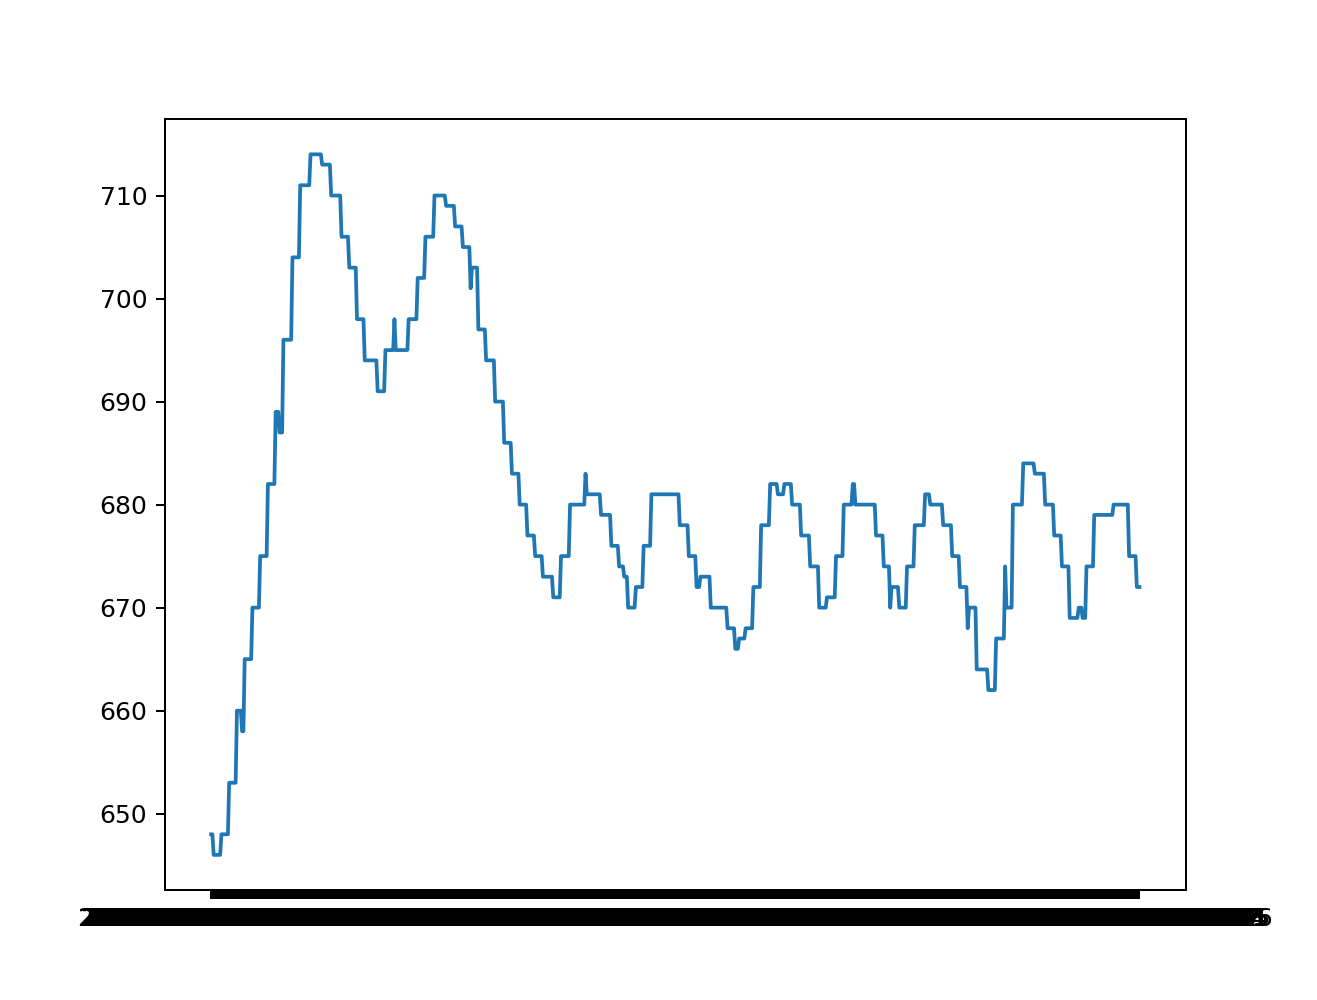

In [123]:
plt.plot(therm_time,curr_temp)

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# INPUT PARAM:
api_key = 'AbziOl3GZDmJKrN4a6MbAIpYBbXR6tPb'
therm_time2 = []
curr_temp2 = []
curr_hum2 = []
temp_setpoint = 700
mode = 'off'
heat = 0

# Create figure for plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
xs = []
ys = []
zs = []


# This function is called periodically from FuncAnimation
def animate(i, xs, ys, zs, data):
    # Read temperature from ecobee
    # WRITE FUNCTION TO READ TEMPERATURE AND CONTROL
    therm_time.append(data[0])
    curr_temp.append(data[1])
    curr_hum.append(data[2])
    print('Current_temp: ', data[1])
    if data[1] < temp_setpoint:
        heat = 1
        if data[3] == 'heat':
            print('Heating mode already enabled')
            EB_hvac_temp(tokens[0], tokens[1], temp=temp_setpoint+30)

        else:
            EB_hvac_mode(tokens[0], tokens[1], mode='heat')
            EB_hvac_temp(tokens[0], tokens[1], temp=temp_setpoint+30)
            print('HEATING')
            print('------------')
    else:
        heat = 0
        if data[3] == 'off':
            print('Off mode enabled')
        else:
            EB_hvac_mode(tokens[0], tokens[1],mode='off')
            print('OFF')
            print('------------')


    # Add x and y to lists
    xs.append(dt.datetime.now().strftime('%H:%M:%S.%f'))
    ys.append(curr_temp/10)
    zs.append(heat)

    # Limit x and y lists to 20 items
    xs = xs[-20:]
    ys = ys[-20:]
    zs = zs[-20:]

    # Draw x and y lists
    ax.clear()
    ax.plot(xs, ys)
    ax.plot(xs, zs)

    # Format plot
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(bottom=0.30)
    plt.title('Ecobee Temperature over Time')
    plt.ylabel('Temperature (deg F)')


while i < 720:
    # Set up plot to call animate() function periodically
    info = EB_info(tokens[0], tokens[1])
    data = info[0]
    tokens = info[1]
    if data != None:
        ani = animation.FuncAnimation(fig, animate, fargs=(xs, ys, zs, data), interval=30000)
        plt.show()
    else:
        print('data equals None')
    i = i+1
    
    


In [156]:
4%2

0

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
xs = []
ys = []
for i in range(40):
    # Add x and y to lists
    xs.append(dt.datetime.now().strftime('%H:%M:%S.%f'))
    ys.append(i)

#     zs.append(heat)

    # Limit x and y lists to 20 items
    xs = xs[-20:]
    ys = ys[-20:]
    print('xs: ', xs)
    print('ys: ', ys)
#     zs = zs[-20:]

    # Draw x and y lists
    ax.clear()
    ax.plot(xs, ys)
#     ax.plot(xs, zs)

    # Format plot
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(bottom=0.30)
    plt.title('Ecobee Temperature over Time')
    plt.ylabel('Temperature (deg F)')
    plt.show()
    time.sleep(1)


<IPython.core.display.Javascript object>

xs:  ['20:22:00.268733']
ys:  [0]
xs:  ['20:22:00.268733', '20:22:01.319568']
ys:  [0, 1]
xs:  ['20:22:00.268733', '20:22:01.319568', '20:22:02.363983']
ys:  [0, 1, 2]
xs:  ['20:22:00.268733', '20:22:01.319568', '20:22:02.363983', '20:22:03.398844']
ys:  [0, 1, 2, 3]
xs:  ['20:22:00.268733', '20:22:01.319568', '20:22:02.363983', '20:22:03.398844', '20:22:04.430289']
ys:  [0, 1, 2, 3, 4]
xs:  ['20:22:00.268733', '20:22:01.319568', '20:22:02.363983', '20:22:03.398844', '20:22:04.430289', '20:22:05.469308']
ys:  [0, 1, 2, 3, 4, 5]
xs:  ['20:22:00.268733', '20:22:01.319568', '20:22:02.363983', '20:22:03.398844', '20:22:04.430289', '20:22:05.469308', '20:22:06.508538']
ys:  [0, 1, 2, 3, 4, 5, 6]
xs:  ['20:22:00.268733', '20:22:01.319568', '20:22:02.363983', '20:22:03.398844', '20:22:04.430289', '20:22:05.469308', '20:22:06.508538', '20:22:07.551745']
ys:  [0, 1, 2, 3, 4, 5, 6, 7]
xs:  ['20:22:00.268733', '20:22:01.319568', '20:22:02.363983', '20:22:03.398844', '20:22:04.430289', '20:22:05.4

KeyboardInterrupt: 

In [128]:
api_key = 'AbziOl3GZDmJKrN4a6MbAIpYBbXR6tPb'
therm_time2 = []
curr_temp2 = []
curr_hum2 = []
temp_setpoint = 700
mode = 'off'
i = 0
tokens = EB_refresh_token(tokens[0], tokens[1], api_key)

# control:
while i < 720:
    info = EB_info(tokens[0], tokens[1])
    data = info[0]
    tokens = info[1]
    if data != None:
        therm_time.append(data[0])
        curr_temp.append(data[1])
        curr_hum.append(data[2])
        print('Current_temp: ', data[1])
        if data[1] < temp_setpoint:
            if data[3] == 'heat':
                print('Heating mode already enabled')
                EB_hvac_temp(tokens[0], tokens[1], temp=temp_setpoint+30)
            else:
                EB_hvac_mode(tokens[0], tokens[1], mode='heat')
                EB_hvac_temp(tokens[0], tokens[1], temp=temp_setpoint+30)
                print('HEATING')
                print('------------')
        else:
            if data[3] == 'off':
                print('Off mode enabled')
            else:
                EB_hvac_mode(tokens[0], tokens[1],mode='off')
                print('OFF')
                print('------------')
    else:
        print('data equals None')
    i = i+1
    time.sleep(30)

# for i in range(720):
#     info = control_heat(temp_setpoint=temp_setpoint, access_token=tokens[0], refresh_token=tokens[1])
#     therm_time.append(info[0])
#     curr_temp.append(info[1])
#     curr_hum.append(info[2])
#     time.sleep(30)

New Refresh_Token:  zdzcXygbQnrVlBoHLqV2OcDdMxHsJoG8
New Access_Token:  7JyNFg6oloMWTZaytQoX2Vuoht31pBCi
Thermostat_time:  2020-02-13 05:50:40
Last_Modified:  2020-02-13 13:48:35
Temperature:  675
Humidity:  43
HVAC Mode:  heat

------------

Current_temp:  675
Heating mode already enabled
Thermostat_time:  2020-02-13 05:51:10
Last_Modified:  2020-02-13 13:51:05
Temperature:  675
Humidity:  43
HVAC Mode:  heat

------------

Current_temp:  675
Heating mode already enabled
Thermostat_time:  2020-02-13 05:51:41
Last_Modified:  2020-02-13 13:51:35
Temperature:  675
Humidity:  43
HVAC Mode:  heat

------------

Current_temp:  675
Heating mode already enabled
Thermostat_time:  2020-02-13 05:52:12
Last_Modified:  2020-02-13 13:52:05
Temperature:  675
Humidity:  43
HVAC Mode:  heat

------------

Current_temp:  675
Heating mode already enabled
Thermostat_time:  2020-02-13 05:52:42
Last_Modified:  2020-02-13 13:52:35
Temperature:  675
Humidity:  43
HVAC Mode:  heat

------------

Current_temp:

Thermostat_time:  2020-02-13 06:13:13
Last_Modified:  2020-02-13 14:13:05
Temperature:  687
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  687
Heating mode already enabled
Thermostat_time:  2020-02-13 06:13:44
Last_Modified:  2020-02-13 14:13:35
Temperature:  687
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  687
Heating mode already enabled
Thermostat_time:  2020-02-13 06:14:15
Last_Modified:  2020-02-13 14:14:05
Temperature:  686
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  686
Heating mode already enabled
Thermostat_time:  2020-02-13 06:14:45
Last_Modified:  2020-02-13 14:14:35
Temperature:  686
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  686
Heating mode already enabled
Thermostat_time:  2020-02-13 06:15:16
Last_Modified:  2020-02-13 14:15:05
Temperature:  686
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  686
Heating mode already enabled
Thermostat_time:  2020-02-13 06:15:47
Last_Modified:  2020-02-13 14:15

Thermostat_time:  2020-02-13 06:36:41
Last_Modified:  2020-02-13 14:30:36
Temperature:  704
Humidity:  41
HVAC Mode:  off

------------

Current_temp:  704
Off mode enabled
Thermostat_time:  2020-02-13 06:37:12
Last_Modified:  2020-02-13 14:30:36
Temperature:  704
Humidity:  41
HVAC Mode:  off

------------

Current_temp:  704
Off mode enabled
Thermostat_time:  2020-02-13 06:37:42
Last_Modified:  2020-02-13 14:30:36
Temperature:  704
Humidity:  41
HVAC Mode:  off

------------

Current_temp:  704
Off mode enabled
Thermostat_time:  2020-02-13 06:38:12
Last_Modified:  2020-02-13 14:30:36
Temperature:  704
Humidity:  41
HVAC Mode:  off

------------

Current_temp:  704
Off mode enabled
Thermostat_time:  2020-02-13 06:38:43
Last_Modified:  2020-02-13 14:30:36
Temperature:  704
Humidity:  41
HVAC Mode:  off

------------

Current_temp:  704
Off mode enabled
Thermostat_time:  2020-02-13 06:39:13
Last_Modified:  2020-02-13 14:30:36
Temperature:  704
Humidity:  41
HVAC Mode:  off

------------

Thermostat_time:  2020-02-13 06:59:13
Last_Modified:  2020-02-13 14:59:05
Temperature:  699
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  699
Heating mode already enabled
Thermostat_time:  2020-02-13 06:59:44
Last_Modified:  2020-02-13 14:59:35
Temperature:  696
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  696
Heating mode already enabled
Thermostat_time:  2020-02-13 07:00:15
Last_Modified:  2020-02-13 15:00:05
Temperature:  696
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  696
Heating mode already enabled
Thermostat_time:  2020-02-13 07:00:46
Last_Modified:  2020-02-13 15:00:37
Temperature:  696
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  696
Heating mode already enabled
Thermostat_time:  2020-02-13 07:01:17
Last_Modified:  2020-02-13 15:01:05
Temperature:  696
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  696
Heating mode already enabled
Thermostat_time:  2020-02-13 07:01:48
Last_Modified:  2020-02-13 15:01

Thermostat_time:  2020-02-13 07:22:39
Last_Modified:  2020-02-13 15:09:35
Temperature:  707
Humidity:  41
HVAC Mode:  off

------------

Current_temp:  707
Off mode enabled
Thermostat_time:  2020-02-13 07:23:10
Last_Modified:  2020-02-13 15:09:35
Temperature:  707
Humidity:  41
HVAC Mode:  off

------------

Current_temp:  707
Off mode enabled
Thermostat_time:  2020-02-13 07:23:40
Last_Modified:  2020-02-13 15:09:35
Temperature:  707
Humidity:  41
HVAC Mode:  off

------------

Current_temp:  707
Off mode enabled
Thermostat_time:  2020-02-13 07:24:10
Last_Modified:  2020-02-13 15:09:35
Temperature:  707
Humidity:  41
HVAC Mode:  off

------------

Current_temp:  707
Off mode enabled
Thermostat_time:  2020-02-13 07:24:41
Last_Modified:  2020-02-13 15:09:35
Temperature:  704
Humidity:  41
HVAC Mode:  off

------------

Current_temp:  704
Off mode enabled
Thermostat_time:  2020-02-13 07:25:11
Last_Modified:  2020-02-13 15:09:35
Temperature:  704
Humidity:  41
HVAC Mode:  off

------------

Thermostat_time:  2020-02-13 07:46:07
Last_Modified:  2020-02-13 15:46:05
Temperature:  691
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  691
Heating mode already enabled
Thermostat_time:  2020-02-13 07:46:38
Last_Modified:  2020-02-13 15:46:35
Temperature:  698
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  698
Heating mode already enabled
Thermostat_time:  2020-02-13 07:47:09
Last_Modified:  2020-02-13 15:47:05
Temperature:  698
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  698
Heating mode already enabled
Thermostat_time:  2020-02-13 07:47:39
Last_Modified:  2020-02-13 15:47:35
Temperature:  698
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  698
Heating mode already enabled
Thermostat_time:  2020-02-13 07:48:10
Last_Modified:  2020-02-13 15:48:05
Temperature:  698
Humidity:  42
HVAC Mode:  heat

------------

Current_temp:  698
Heating mode already enabled
Thermostat_time:  2020-02-13 07:48:41
Last_Modified:  2020-02-13 15:48

Thermostat_time:  2020-02-13 08:09:06
Last_Modified:  2020-02-13 16:09:05
Temperature:  687
Humidity:  44
HVAC Mode:  heat

------------

Current_temp:  687
Heating mode already enabled
Thermostat_time:  2020-02-13 08:09:37
Last_Modified:  2020-02-13 16:09:35
Temperature:  689
Humidity:  43
HVAC Mode:  heat

------------

Current_temp:  689
Heating mode already enabled
Thermostat_time:  2020-02-13 08:10:07
Last_Modified:  2020-02-13 16:10:05
Temperature:  689
Humidity:  43
HVAC Mode:  heat

------------

Current_temp:  689
Heating mode already enabled
Thermostat_time:  2020-02-13 08:10:38
Last_Modified:  2020-02-13 16:10:35
Temperature:  689
Humidity:  43
HVAC Mode:  heat

------------

Current_temp:  689
Heating mode already enabled
Thermostat_time:  2020-02-13 08:11:09
Last_Modified:  2020-02-13 16:11:05
Temperature:  689
Humidity:  43
HVAC Mode:  heat

------------

Current_temp:  689
Heating mode already enabled
Thermostat_time:  2020-02-13 08:11:39
Last_Modified:  2020-02-13 16:11

Thermostat_time:  2020-02-13 08:32:30
Last_Modified:  2020-02-13 16:18:35
Temperature:  712
Humidity:  41
HVAC Mode:  off

------------

Current_temp:  712
Off mode enabled
Thermostat_time:  2020-02-13 08:33:00
Last_Modified:  2020-02-13 16:18:35
Temperature:  712
Humidity:  41
HVAC Mode:  off

------------

Current_temp:  712
Off mode enabled
Thermostat_time:  2020-02-13 08:33:30
Last_Modified:  2020-02-13 16:18:35
Temperature:  709
Humidity:  41
HVAC Mode:  off

------------

Current_temp:  709
Off mode enabled
Thermostat_time:  2020-02-13 08:34:01
Last_Modified:  2020-02-13 16:18:35
Temperature:  709
Humidity:  41
HVAC Mode:  off

------------

Current_temp:  709
Off mode enabled
Thermostat_time:  2020-02-13 08:34:31
Last_Modified:  2020-02-13 16:18:35
Temperature:  709
Humidity:  41
HVAC Mode:  off

------------

Current_temp:  709
Off mode enabled
Thermostat_time:  2020-02-13 08:35:01
Last_Modified:  2020-02-13 16:18:35
Temperature:  709
Humidity:  41
HVAC Mode:  off

------------

ConnectionError: HTTPSConnectionPool(host='api.ecobee.com', port=443): Max retries exceeded with url: /1/thermostat?json=%7B%22selection%22%3A%7B%22selectionType%22%3A%22registered%22%2C%22selectionMatch%22%3A%22%22%2C%22includeRuntime%22%3A%22true%22%2C%22includeSettings%22%3A%22true%22%7D%7D (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x10b9bf9e8>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

In [141]:
import pandas as pd
ecobee = {'datetime':therm_time, 'temp':curr_temp}
df = pd.DataFrame(ecobee, columns = ['datetime', 'temp'])
pd.to_datetime(df['datetime'],inplace=True)
df.head()

TypeError: to_datetime() got an unexpected keyword argument 'inplace'

In [137]:
therm_time

['2020-02-12 21:31:36',
 '2020-02-12 21:32:06',
 '2020-02-12 21:32:37',
 '2020-02-12 21:33:07',
 '2020-02-12 21:33:37',
 '2020-02-12 21:34:11',
 '2020-02-12 21:34:41',
 '2020-02-12 21:35:12',
 '2020-02-12 21:35:42',
 '2020-02-12 21:36:12',
 '2020-02-12 21:36:43',
 '2020-02-12 21:37:13',
 '2020-02-12 21:37:43',
 '2020-02-12 21:38:14',
 '2020-02-12 21:38:44',
 '2020-02-12 21:39:14',
 '2020-02-12 21:39:45',
 '2020-02-12 21:40:15',
 '2020-02-12 21:40:45',
 '2020-02-12 21:41:16',
 '2020-02-12 21:41:46',
 '2020-02-12 21:42:17',
 '2020-02-12 21:42:47',
 '2020-02-12 21:43:17',
 '2020-02-12 21:43:48',
 '2020-02-12 21:44:18',
 '2020-02-12 21:44:48',
 '2020-02-12 21:45:19',
 '2020-02-12 21:45:49',
 '2020-02-12 21:46:19',
 '2020-02-12 21:46:50',
 '2020-02-12 21:47:20',
 '2020-02-12 21:47:51',
 '2020-02-12 21:48:21',
 '2020-02-12 21:48:51',
 '2020-02-12 21:49:22',
 '2020-02-12 21:49:52',
 '2020-02-12 21:50:23',
 '2020-02-12 21:50:53',
 '2020-02-12 21:51:24',
 '2020-02-12 21:51:54',
 '2020-02-12 21:

In [127]:
tokens = ['AgUqUGZKfh8aKnhm9fufkf5GtgDlbuZY', 'RiFnfykXQggfoORSRUPJB6eII9tUhuKc']

In [6]:
# api_key = 'Sp2ixgD56v9NB9hUozd17nYWJ9fAjrti'
api_key = 'AbziOl3GZDmJKrN4a6MbAIpYBbXR6tPb'
# auth_code = EB_auth_code(api_key)
# tokens = EB_access_token(api_key, auth_code)

# tokens = EB_refresh_token(tokens[0], tokens[1], api_key)
# print(tokens)
data = EB_info(tokens[0], tokens[1])
print(data)
# hvac_mode = EB_hvac_mode(tokens[0], tokens[1], mode="heat")
# print('mode: ', hvac_mode)
# EB_hvac_temp(tokens[0], tokens[1], temp=730)

Thermostat_time:  2020-02-20 12:21:56
Last_Modified:  2020-02-16 03:09:35
Temperature:  681
Humidity:  48
HVAC Mode:  heat

------------

[['2020-02-20 12:21:56', 681, 48, 'heat'], ['idFtNwcPkRAWGVD9avDnuODXwX3jneIm', 'lmEraJEdplZAwRX0Ilow9MRmEoj2ongs']]


In [5]:
tokens

['idFtNwcPkRAWGVD9avDnuODXwX3jneIm', 'lmEraJEdplZAwRX0Ilow9MRmEoj2ongs']

In [113]:
tokens[0] = 'ilFsLOG1OlTZ6hLmnjoG1onMToxelpvk'
tokens[1] = 'H0Rh2krpFwTVaf8psK7NyGOqipYxLnKC'

In [35]:
# Setting HVAC Mode

# tokens = EB_refresh_token(tokens[0], tokens[1])
EB_hvac_mode(tokens[0], tokens[1],mode='heat')
EB_hvac_temp(tokens[0], tokens[1], temp=650)

<Response [500]>
{'status': {'code': 4, 'message': 'Serialization error. Not permitted to update model: Thermostat'}}
<Response [500]>
{'status': {'code': 11, 'message': 'Function error. Not permitted to execute function due to missing permissions. Function: setHold'}}


In [169]:
# Reading Settings

url = 'https://api.ecobee.com/1/thermostat'
header = {'Content-Type':'text/json', 'Authorization':'Bearer ' + tokens[0]}
payload = {'json': '{"selection":{"selectionType":"registered","selectionMatch":"","includeSettings":"true"}}'}
resp = requests.get(url, params=payload, headers=header)
resp.json()['thermostatList'][0]['settings']

# try:
#     therm_time = resp.json()['thermostatList'][0]['thermostatTime']
#     last_mod = resp.json()['thermostatList'][0]['lastModified']
#     temp = resp.json()['thermostatList'][0]['runtime']['actualTemperature']
#     hum = resp.json()['thermostatList'][0]['runtime']['actualHumidity']
#     print('Thermostat_time: ', therm_time)
#     print('Last_Modified: ', last_mod)
#     print('Temperature: ', temp)
#     print('Humidity: ', hum)
#     print()
#     print('------------')
#     print()

{'hvacMode': 'off',
 'lastServiceDate': '2019-10-01',
 'serviceRemindMe': True,
 'monthsBetweenService': 6,
 'remindMeDate': '2020-04-01',
 'vent': 'off',
 'ventilatorMinOnTime': 20,
 'serviceRemindTechnician': False,
 'eiLocation': '',
 'coldTempAlert': 500,
 'coldTempAlertEnabled': True,
 'hotTempAlert': 920,
 'hotTempAlertEnabled': True,
 'coolStages': 1,
 'heatStages': 0,
 'maxSetBack': 100,
 'maxSetForward': 80,
 'quickSaveSetBack': 40,
 'quickSaveSetForward': 40,
 'hasHeatPump': True,
 'hasForcedAir': False,
 'hasBoiler': False,
 'hasHumidifier': False,
 'hasErv': False,
 'hasHrv': False,
 'condensationAvoid': False,
 'useCelsius': False,
 'useTimeFormat12': True,
 'locale': 'en',
 'humidity': '36',
 'humidifierMode': 'off',
 'backlightOnIntensity': 10,
 'backlightSleepIntensity': 4,
 'backlightOffTime': 60,
 'soundTickVolume': 0,
 'soundAlertVolume': 0,
 'compressorProtectionMinTime': 300,
 'compressorProtectionMinTemp': 350,
 'stage1HeatingDifferentialTemp': 5,
 'stage1CoolingD

In [177]:
# Reading temperature

url = 'https://api.ecobee.com/1/thermostat'
header = {'Content-Type':'text/json', 'Authorization':'Bearer ' + tokens[0]}
payload = {'json': '{"selection":{"selectionType":"registered","selectionMatch":"","includeRuntime":"true"}}'}
resp = requests.get(url, params=payload, headers=header)
# print(resp.json())
try:
    therm_time = resp.json()['thermostatList'][0]['thermostatTime']
    last_mod = resp.json()['thermostatList'][0]['lastModified']
    temp = resp.json()['thermostatList'][0]['runtime']['actualTemperature']
    hum = resp.json()['thermostatList'][0]['runtime']['actualHumidity']
    print('Thermostat_time: ', therm_time)
    print('Last_Modified: ', last_mod)
    print('Temperature: ', temp)
    print('Humidity: ', hum)
    print()
    print('------------')
    print()
except KeyError:
    print('Key not present. Most likely token is expired. Refreshing and continuing...')
    # Call Refresh token
    tokens = EB_refresh_token(access_token, refresh_token)
    access_token = tokens[0]
    refresh_token = tokens[1]
    url = 'https://api.ecobee.com/1/thermostat'
    header = {'Content-Type':'text/json', 'Authorization':'Bearer ' + access_token}
    payload = {'json': '{"selection":{"selectionType":"registered","selectionMatch":"","includeRuntime":"true"}}'}
    resp = requests.get(url, params=payload, headers=header)
    therm_time = resp.json()['thermostatList'][0]['thermostatTime']
    last_mod = resp.json()['thermostatList'][0]['lastModified']
    temp = resp.json()['thermostatList'][0]['runtime']['actualTemperature']
    hum = resp.json()['thermostatList'][0]['runtime']['actualHumidity']
    print('Thermostat_time: ', therm_time)
    print('Last_Modified: ', last_mod)
    print('Temperature: ', temp)
    print('Humidity: ', hum)
    print()
#     print('------------')
#     print()


# print(response.url)
# print(response.text)


Thermostat_time:  2020-02-07 12:50:59
Last_Modified:  2020-02-07 20:49:08
Temperature:  677
Humidity:  48

------------



In [138]:
resp.json()

{'page': {'page': 1, 'totalPages': 1, 'pageSize': 1, 'total': 1},
 'thermostatList': [{'identifier': '412806702637',
   'name': 'My ecobee',
   'thermostatRev': '200207171638',
   'isRegistered': True,
   'modelNumber': 'nikeSmart',
   'brand': 'ecobee',
   'features': 'Home,HomeKit',
   'lastModified': '2020-02-07 17:16:38',
   'thermostatTime': '2020-02-07 09:43:23',
   'utcTime': '2020-02-07 17:43:23',
   'runtime': {'runtimeRev': '200207174136',
    'connected': True,
    'firstConnected': '2020-02-01 00:24:03',
    'connectDateTime': '2020-02-05 20:22:23',
    'disconnectDateTime': '2020-02-01 07:34:54',
    'lastModified': '2020-02-07 17:41:36',
    'lastStatusModified': '2020-02-07 17:41:36',
    'runtimeDate': '2020-02-07',
    'runtimeInterval': 211,
    'actualTemperature': 644,
    'actualHumidity': 49,
    'rawTemperature': 644,
    'showIconMode': 0,
    'desiredHeat': 610,
    'desiredCool': 730,
    'desiredHumidity': 36,
    'desiredDehumidity': 60,
    'desiredFanMode'

In [92]:
temp_list = []
thermostat_time_list = []
hum_list = []
last_modified_list = []
t = range(3)
for i in range(720):
    url = 'https://api.ecobee.com/1/thermostat'
    header = {'Content-Type':'text/json', 'Authorization':'Bearer ' + access_token}
    payload = {'json': '{"selection":{"selectionType":"registered","selectionMatch":"","includeRuntime":"true"}}'}
    resp = requests.get(url, params=payload, headers=header)
    try:
        therm_time = resp.json()['thermostatList'][0]['thermostatTime']
        last_mod = resp.json()['thermostatList'][0]['lastModified']
        temp = resp.json()['thermostatList'][0]['runtime']['actualTemperature']
        hum = resp.json()['thermostatList'][0]['runtime']['actualHumidity']
        print('Thermostat_time: ', therm_time)
        print('Last_Modified: ', last_mod)
        print('Temperature: ', temp)
        print('Humidity: ', hum)
        print()
        print('------------')
        print()
    except KeyError:
        print('Key not present. Most likely token is expired. Refreshing and continuing...')
        # Call Refresh token
        tokens = EB_refresh_token(access_token, refresh_token)
        access_token = tokens[0]
        refresh_token = tokens[1]
        url = 'https://api.ecobee.com/1/thermostat'
        header = {'Content-Type':'text/json', 'Authorization':'Bearer ' + access_token}
        payload = {'json': '{"selection":{"selectionType":"registered","selectionMatch":"","includeRuntime":"true"}}'}
        resp = requests.get(url, params=payload, headers=header)
        therm_time = resp.json()['thermostatList'][0]['thermostatTime']
        last_mod = resp.json()['thermostatList'][0]['lastModified']
        temp = resp.json()['thermostatList'][0]['runtime']['actualTemperature']
        hum = resp.json()['thermostatList'][0]['runtime']['actualHumidity']
        print('Thermostat_time: ', therm_time)
        print('Last_Modified: ', last_mod)
        print('Temperature: ', temp)
        print('Humidity: ', hum)
        print()
        print('------------')
        print()
    temp_list.append(temp)
    thermostat_time_list.append(therm_time)
    hum_list.append(hum)
    last_modified_list.append(last_mod)
    time.sleep(10)

Thermostat_time:  2020-02-06 22:02:28
Last_Modified:  2020-02-06 18:05:08
Temperature:  619
Humidity:  52

------------

Thermostat_time:  2020-02-06 22:02:39
Last_Modified:  2020-02-06 18:05:08
Temperature:  619
Humidity:  52

------------

Thermostat_time:  2020-02-06 22:02:50
Last_Modified:  2020-02-06 18:05:08
Temperature:  619
Humidity:  52

------------

Thermostat_time:  2020-02-06 22:03:00
Last_Modified:  2020-02-06 18:05:08
Temperature:  619
Humidity:  52

------------

Thermostat_time:  2020-02-06 22:03:11
Last_Modified:  2020-02-06 18:05:08
Temperature:  619
Humidity:  52

------------

Thermostat_time:  2020-02-06 22:03:22
Last_Modified:  2020-02-06 18:05:08
Temperature:  619
Humidity:  52

------------

Thermostat_time:  2020-02-06 22:03:33
Last_Modified:  2020-02-06 18:05:08
Temperature:  619
Humidity:  52

------------

Thermostat_time:  2020-02-06 22:03:44
Last_Modified:  2020-02-06 18:05:08
Temperature:  619
Humidity:  52

------------

Thermostat_time:  2020-02-06 22:

Thermostat_time:  2020-02-06 22:14:33
Last_Modified:  2020-02-07 06:11:08
Temperature:  619
Humidity:  53

------------

Thermostat_time:  2020-02-06 22:14:43
Last_Modified:  2020-02-07 06:11:08
Temperature:  619
Humidity:  53

------------

Thermostat_time:  2020-02-06 22:14:54
Last_Modified:  2020-02-07 06:11:08
Temperature:  619
Humidity:  53

------------

Thermostat_time:  2020-02-06 22:15:04
Last_Modified:  2020-02-07 06:11:08
Temperature:  619
Humidity:  53

------------

Thermostat_time:  2020-02-06 22:15:15
Last_Modified:  2020-02-07 06:11:08
Temperature:  619
Humidity:  53

------------

Thermostat_time:  2020-02-06 22:15:25
Last_Modified:  2020-02-07 06:11:08
Temperature:  619
Humidity:  53

------------

Thermostat_time:  2020-02-06 22:15:36
Last_Modified:  2020-02-07 06:11:08
Temperature:  619
Humidity:  53

------------

Thermostat_time:  2020-02-06 22:15:47
Last_Modified:  2020-02-07 06:11:08
Temperature:  619
Humidity:  53

------------

Thermostat_time:  2020-02-06 22:

Thermostat_time:  2020-02-06 22:26:33
Last_Modified:  2020-02-07 06:21:38
Temperature:  634
Humidity:  51

------------

Thermostat_time:  2020-02-06 22:26:44
Last_Modified:  2020-02-07 06:21:38
Temperature:  631
Humidity:  51

------------

Thermostat_time:  2020-02-06 22:26:55
Last_Modified:  2020-02-07 06:21:38
Temperature:  631
Humidity:  51

------------

Thermostat_time:  2020-02-06 22:27:05
Last_Modified:  2020-02-07 06:21:38
Temperature:  631
Humidity:  51

------------

Thermostat_time:  2020-02-06 22:27:16
Last_Modified:  2020-02-07 06:21:38
Temperature:  631
Humidity:  51

------------

Thermostat_time:  2020-02-06 22:27:26
Last_Modified:  2020-02-07 06:21:38
Temperature:  631
Humidity:  51

------------

Thermostat_time:  2020-02-06 22:27:37
Last_Modified:  2020-02-07 06:21:38
Temperature:  631
Humidity:  51

------------

Thermostat_time:  2020-02-06 22:27:48
Last_Modified:  2020-02-07 06:21:38
Temperature:  631
Humidity:  51

------------

Thermostat_time:  2020-02-06 22:

Thermostat_time:  2020-02-06 22:38:35
Last_Modified:  2020-02-07 06:21:38
Temperature:  654
Humidity:  50

------------

Thermostat_time:  2020-02-06 22:38:46
Last_Modified:  2020-02-07 06:21:38
Temperature:  654
Humidity:  50

------------

Thermostat_time:  2020-02-06 22:38:56
Last_Modified:  2020-02-07 06:21:38
Temperature:  662
Humidity:  49

------------

Thermostat_time:  2020-02-06 22:39:08
Last_Modified:  2020-02-07 06:21:38
Temperature:  662
Humidity:  49

------------

Thermostat_time:  2020-02-06 22:39:18
Last_Modified:  2020-02-07 06:21:38
Temperature:  662
Humidity:  49

------------

Thermostat_time:  2020-02-06 22:39:29
Last_Modified:  2020-02-07 06:21:38
Temperature:  662
Humidity:  49

------------

Thermostat_time:  2020-02-06 22:39:39
Last_Modified:  2020-02-07 06:21:38
Temperature:  662
Humidity:  49

------------

Thermostat_time:  2020-02-06 22:39:50
Last_Modified:  2020-02-07 06:21:38
Temperature:  662
Humidity:  49

------------

Thermostat_time:  2020-02-06 22:

Thermostat_time:  2020-02-06 22:50:35
Last_Modified:  2020-02-07 06:21:38
Temperature:  669
Humidity:  48

------------

Thermostat_time:  2020-02-06 22:50:46
Last_Modified:  2020-02-07 06:21:38
Temperature:  669
Humidity:  48

------------

Thermostat_time:  2020-02-06 22:50:56
Last_Modified:  2020-02-07 06:21:38
Temperature:  669
Humidity:  48

------------

Thermostat_time:  2020-02-06 22:51:07
Last_Modified:  2020-02-07 06:21:38
Temperature:  669
Humidity:  48

------------

Thermostat_time:  2020-02-06 22:51:17
Last_Modified:  2020-02-07 06:21:38
Temperature:  669
Humidity:  48

------------

Thermostat_time:  2020-02-06 22:51:28
Last_Modified:  2020-02-07 06:21:38
Temperature:  669
Humidity:  48

------------

Thermostat_time:  2020-02-06 22:51:39
Last_Modified:  2020-02-07 06:21:38
Temperature:  669
Humidity:  48

------------

Thermostat_time:  2020-02-06 22:51:49
Last_Modified:  2020-02-07 06:21:38
Temperature:  669
Humidity:  48

------------

Thermostat_time:  2020-02-06 22:

Thermostat_time:  2020-02-06 23:02:07
Last_Modified:  2020-02-07 07:00:08
Temperature:  674
Humidity:  47

------------

Thermostat_time:  2020-02-06 23:02:18
Last_Modified:  2020-02-07 07:00:08
Temperature:  674
Humidity:  47

------------

Thermostat_time:  2020-02-06 23:02:29
Last_Modified:  2020-02-07 07:00:08
Temperature:  674
Humidity:  47

------------

Thermostat_time:  2020-02-06 23:02:39
Last_Modified:  2020-02-07 07:00:08
Temperature:  674
Humidity:  47

------------

Thermostat_time:  2020-02-06 23:02:50
Last_Modified:  2020-02-07 07:00:08
Temperature:  674
Humidity:  47

------------

Thermostat_time:  2020-02-06 23:03:00
Last_Modified:  2020-02-07 07:00:08
Temperature:  674
Humidity:  47

------------

Thermostat_time:  2020-02-06 23:03:11
Last_Modified:  2020-02-07 07:00:08
Temperature:  674
Humidity:  47

------------

Thermostat_time:  2020-02-06 23:03:21
Last_Modified:  2020-02-07 07:00:08
Temperature:  674
Humidity:  47

------------

Thermostat_time:  2020-02-06 23:

Thermostat_time:  2020-02-06 23:14:06
Last_Modified:  2020-02-07 07:00:08
Temperature:  671
Humidity:  46

------------

Thermostat_time:  2020-02-06 23:14:17
Last_Modified:  2020-02-07 07:00:08
Temperature:  671
Humidity:  46

------------

Thermostat_time:  2020-02-06 23:14:27
Last_Modified:  2020-02-07 07:00:08
Temperature:  671
Humidity:  46

------------

Thermostat_time:  2020-02-06 23:14:38
Last_Modified:  2020-02-07 07:00:08
Temperature:  671
Humidity:  46

------------

Thermostat_time:  2020-02-06 23:14:48
Last_Modified:  2020-02-07 07:00:08
Temperature:  671
Humidity:  46

------------

Thermostat_time:  2020-02-06 23:14:59
Last_Modified:  2020-02-07 07:00:08
Temperature:  671
Humidity:  46

------------

Thermostat_time:  2020-02-06 23:15:09
Last_Modified:  2020-02-07 07:00:08
Temperature:  671
Humidity:  46

------------

Thermostat_time:  2020-02-06 23:15:20
Last_Modified:  2020-02-07 07:00:08
Temperature:  671
Humidity:  46

------------

Thermostat_time:  2020-02-06 23:

Thermostat_time:  2020-02-06 23:26:06
Last_Modified:  2020-02-07 07:00:08
Temperature:  657
Humidity:  48

------------

Thermostat_time:  2020-02-06 23:26:16
Last_Modified:  2020-02-07 07:00:08
Temperature:  657
Humidity:  48

------------

Thermostat_time:  2020-02-06 23:26:27
Last_Modified:  2020-02-07 07:00:08
Temperature:  658
Humidity:  48

------------

Thermostat_time:  2020-02-06 23:26:37
Last_Modified:  2020-02-07 07:00:08
Temperature:  658
Humidity:  48

------------

Thermostat_time:  2020-02-06 23:26:48
Last_Modified:  2020-02-07 07:00:08
Temperature:  658
Humidity:  48

------------

Thermostat_time:  2020-02-06 23:26:58
Last_Modified:  2020-02-07 07:00:08
Temperature:  658
Humidity:  48

------------

Thermostat_time:  2020-02-06 23:27:09
Last_Modified:  2020-02-07 07:00:08
Temperature:  658
Humidity:  48

------------

Thermostat_time:  2020-02-06 23:27:20
Last_Modified:  2020-02-07 07:00:08
Temperature:  658
Humidity:  48

------------

Thermostat_time:  2020-02-06 23:

Thermostat_time:  2020-02-06 23:38:05
Last_Modified:  2020-02-07 07:00:08
Temperature:  652
Humidity:  49

------------

Thermostat_time:  2020-02-06 23:38:16
Last_Modified:  2020-02-07 07:00:08
Temperature:  657
Humidity:  48

------------

Thermostat_time:  2020-02-06 23:38:26
Last_Modified:  2020-02-07 07:00:08
Temperature:  657
Humidity:  48

------------

Thermostat_time:  2020-02-06 23:38:37
Last_Modified:  2020-02-07 07:00:08
Temperature:  657
Humidity:  48

------------

Thermostat_time:  2020-02-06 23:38:47
Last_Modified:  2020-02-07 07:00:08
Temperature:  657
Humidity:  48

------------

Thermostat_time:  2020-02-06 23:38:58
Last_Modified:  2020-02-07 07:00:08
Temperature:  657
Humidity:  48

------------

Thermostat_time:  2020-02-06 23:39:08
Last_Modified:  2020-02-07 07:00:08
Temperature:  657
Humidity:  48

------------

Thermostat_time:  2020-02-06 23:39:19
Last_Modified:  2020-02-07 07:00:08
Temperature:  657
Humidity:  48

------------

Thermostat_time:  2020-02-06 23:

Thermostat_time:  2020-02-06 23:50:03
Last_Modified:  2020-02-07 07:00:08
Temperature:  665
Humidity:  48

------------

Thermostat_time:  2020-02-06 23:50:14
Last_Modified:  2020-02-07 07:00:08
Temperature:  665
Humidity:  48

------------

Thermostat_time:  2020-02-06 23:50:24
Last_Modified:  2020-02-07 07:00:08
Temperature:  665
Humidity:  48

------------

Thermostat_time:  2020-02-06 23:50:35
Last_Modified:  2020-02-07 07:00:08
Temperature:  665
Humidity:  48

------------

Thermostat_time:  2020-02-06 23:50:45
Last_Modified:  2020-02-07 07:00:08
Temperature:  665
Humidity:  48

------------

Thermostat_time:  2020-02-06 23:50:56
Last_Modified:  2020-02-07 07:00:08
Temperature:  665
Humidity:  48

------------

Thermostat_time:  2020-02-06 23:51:06
Last_Modified:  2020-02-07 07:00:08
Temperature:  665
Humidity:  48

------------

Thermostat_time:  2020-02-06 23:51:17
Last_Modified:  2020-02-07 07:00:08
Temperature:  665
Humidity:  48

------------

Thermostat_time:  2020-02-06 23:

Thermostat_time:  2020-02-07 00:01:31
Last_Modified:  2020-02-07 07:00:08
Temperature:  655
Humidity:  48

------------

Thermostat_time:  2020-02-07 00:01:41
Last_Modified:  2020-02-07 07:00:08
Temperature:  655
Humidity:  48

------------

Thermostat_time:  2020-02-07 00:01:52
Last_Modified:  2020-02-07 07:00:08
Temperature:  655
Humidity:  48

------------

Thermostat_time:  2020-02-07 00:02:02
Last_Modified:  2020-02-07 07:00:08
Temperature:  655
Humidity:  48

------------

Thermostat_time:  2020-02-07 00:02:13
Last_Modified:  2020-02-07 07:00:08
Temperature:  655
Humidity:  48

------------

Thermostat_time:  2020-02-07 00:02:23
Last_Modified:  2020-02-07 07:00:08
Temperature:  655
Humidity:  48

------------

Thermostat_time:  2020-02-07 00:02:34
Last_Modified:  2020-02-07 07:00:08
Temperature:  655
Humidity:  48

------------

Thermostat_time:  2020-02-07 00:02:45
Last_Modified:  2020-02-07 07:00:08
Temperature:  655
Humidity:  48

------------

Thermostat_time:  2020-02-07 00:

In [93]:
mylist = [temp_list,thermostat_time_list,hum_list]
mylist

[[619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  619,
  623,
  623,
  623,
  623,
  623,
  623,
  623,
  623,
  623,
  623,
  623,
  623,
  623,
  623,
  623,
  623,
  623,
  629,
  629,
  629,
  629,
  629,
  629,
  629,
  629,
  629,
  629,
  629,
  629,
  629,
  629,
  629,
  629,
  629,
  629,
  629,
  629,
  634,
  634,
  634,
  631,
  631,
  631,
  631,
  631,
  631,

In [96]:
import csv
with open('ecobee_Temp_data.csv', 'w', newline='') as myfile:
     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
     wr.writerow(temp_list)
    
with open('ecobee_Timestamp_data.csv', 'w', newline='') as myfile:
     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
     wr.writerow(thermostat_time_list)
    

In [49]:
temp = [-1]
thermostat_time = [-1]
last_mod = [-1]
t = range(3)
for i in range(60):
    response = requests.get(url, params=payload, headers=header)
    resp = response.json()
    therm_time = resp['thermostatList'][0]['thermostatTime']
    last_mod = resp['thermostatList'][0]['lastModified']
    temp = resp['thermostatList'][0]['runtime']['actualTemperature']
    hum = resp['thermostatList'][0]['runtime']['actualHumidity']
    print('Thermostat_time: ', therm_time)
    print('Last_Modified: ', last_mod)
    print('Temperature: ', temp)
    print('Humidity: ', hum)
    print()
    print('------------')
    print()
    time.sleep(10)
#     resp['thermostatList'][0]

KeyError: 'thermostatList'